In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# I Cours 2 - Première partie : Liaison entre deux variables quantitatives

In [2]:
# crime violent aux USA
dataCrime = pd.read_csv('CrimeStateDate.csv')
dataCrime.describe(include='all')

,Etat,Date,Population,Crime_Violent
count,2341,2341.000000,2.341000e+03,2341.000000
unique,51,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN
freq,46,NaN,NaN,NaN
mean,NaN,1982.543785,4.559175e+06,22854.015805
std,NaN,13.258875,5.041065e+06,38717.581833
min,NaN,1960.000000,2.261670e+05,37.000000
25%,NaN,1971.000000,1.111000e+06,2785.000000
50%,NaN,1983.000000,3.115000e+06,10085.000000
75%,NaN,1994.000000,5.439692e+06,26093.000000


In [3]:
dataCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Etat           2341 non-null   object
 1   Date           2341 non-null   int64 
 2   Population     2341 non-null   int64 
 3   Crime_Violent  2341 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.3+ KB


In [7]:
dfTest=dataCrime.Date.unique()
dfTest

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005])

<AxesSubplot:xlabel='Population', ylabel='Crime_Violent'>

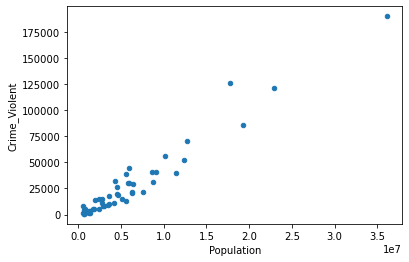

In [8]:
dataCrime[dataCrime.Date==2005].plot(kind="scatter",x="Population",y="Crime_Violent")

In [10]:
# Centrer et réduire les données 
# create data
dfCentrerReduire = pd.DataFrame([
                   [180000, 110, 18.9, 1400], 
                   [360000, 905, 23.4, 1800], 
                   [230000, 230, 14.0, 1300], 
                   [60000, 450, 13.5, 1500]], 
   
                   columns=['Col A', 'Col B',
                            'Col C', 'Col D'])
# view data
display(dfCentrerReduire)

,Col A,Col B,Col C,Col D
0,180000,110,18.9,1400
1,360000,905,23.4,1800
2,230000,230,14.0,1300
3,60000,450,13.5,1500


In [11]:
dfCentrerReduire.describe(include='all')

,Col A,Col B,Col C,Col D
count,4.000000,4.00000,4.000000,4.00000
mean,207500.000000,423.75000,17.450000,1500.00000
std,124197.423484,350.36588,4.655105,216.02469
min,60000.000000,110.00000,13.500000,1300.00000
25%,150000.000000,200.00000,13.875000,1375.00000
50%,205000.000000,340.00000,16.450000,1450.00000
75%,262500.000000,563.75000,20.025000,1575.00000
max,360000.000000,905.00000,23.400000,1800.00000


In [12]:
# standardize the values in each column (méthode classique)
# copy the data
df_z_scaled = dfCentrerReduire.copy()
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()
 
df_z_scaled

,Col A,Col B,Col C,Col D
0,-0.221422,-0.895492,0.311486,-0.46291
1,1.227884,1.373564,1.278167,1.38873
2,0.181163,-0.552993,-0.741122,-0.92582
3,-1.187625,0.074922,-0.848531,0.00000


In [17]:
df_z_scaled = dfCentrerReduire.apply(lambda x: (x-x.mean())/x.std())
df_z_scaled.describe(include='all')

,Col A,Col B,Col C,Col D
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000
mean,-5.551115e-17,1.734723e-17,-2.775558e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-1.187625e+00,-8.954924e-01,-8.485309e-01,-0.925820
25%,-4.629726e-01,-6.386181e-01,-7.679741e-01,-0.578638
50%,-2.012924e-02,-2.390358e-01,-2.148179e-01,-0.231455
75%,4.428433e-01,3.995823e-01,5.531562e-01,0.347183
max,1.227884e+00,1.373564e+00,1.278167e+00,1.388730


In [15]:
# ATTENTION ne marche pas !
from sklearn.preprocessing import StandardScaler
# initialize the scaler
scaler = StandardScaler(with_mean=True, with_std=True)
#standard=preprocessing.scale(dfCentrerReduire)
# Apply the transormation
df_sklearn = scaler.fit_transform(dfCentrerReduire.to_numpy())
df_sklearn
df_sklearn = pd.DataFrame(df_sklearn, columns=['Col A', 'Col B',
                            'Col C', 'Col D'])
df_sklearn

,Col A,Col B,Col C,Col D
0,-0.255676,-1.034026,0.359673,-0.534522
1,1.417838,1.586055,1.475900,1.603567
2,0.209189,-0.638542,-0.855774,-1.069045
3,-1.371352,0.086512,-0.979799,0.000000


In [18]:
from scipy import stats

print('transformed')
print(stats.zscore(dfCentrerReduire))

transformed
      Col A     Col B     Col C     Col D
0 -0.255676 -1.034026  0.359673 -0.534522
1  1.417838  1.586055  1.475900  1.603567
2  0.209189 -0.638542 -0.855774 -1.069045
3 -1.371352  0.086512 -0.979799  0.000000


<AxesSubplot:xlabel='Pop_Log10', ylabel='Crime_Log10'>

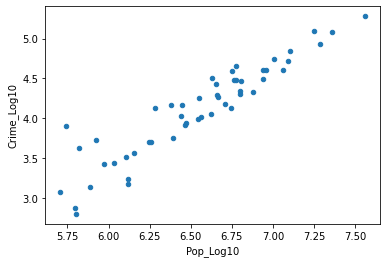

In [9]:
dataCrime["Pop_Log10"]=np.log10(dataCrime["Population"])
dataCrime["Crime_Log10"]=np.log10(dataCrime["Crime_Violent"])
dataCrime[dataCrime.Date==2005].plot(kind="scatter",x="Pop_Log10",y="Crime_Log10")

In [19]:
sns.set_palette(sns.color_palette('Paired', n_colors = dataCrime.Etat.unique().size))

In [ ]:
# crime violent aux USA
#sns.set_palette(seaborn.color_palette('hls1', n_colors = dataCrime["Etat"].unique.size))
grid1 = sns.FacetGrid(dataCrime, col='Date', col_wrap=4, hue='Etat')
grid1.map(sns.scatterplot, 'Pop_Log10', 'Crime_Log10')
grid1.add_legend()

In [20]:
# Corrélation de Pearson avec Pandas
X = pd.Series(dataCrime.Population)
Y = pd.Series(dataCrime.Crime_Violent)
X.corr(Y) #Pearson par défaut

0.9015954724301449

In [21]:
# à titre d'exemple spearman
X.corr(Y, method='spearman')

0.8861688707695606

In [22]:
# à titre d'exemple kendall
X.corr(Y, method='kendall')

0.7137867689052079

In [23]:
# Corrélation de Pearson avec ScyPy
import scipy.stats
scipy.stats.pearsonr(X, Y)[0]

0.9015954724301447

In [24]:
# Corrélation de Pearson avec NumPy
# Le résultat est une matrice
np.corrcoef(X, Y)

array([[1.        , 0.90159547],
       [0.90159547, 1.        ]])

In [ ]:
sns.lmplot(x='Pop_Log10', y='Crime_Log10',data=dataCrime[dataCrime.Date==2005]);

In [ ]:
# La régression linéaire de type FacetGrid avec SeaBorn
sns.lmplot(x='Pop_Log10', y='Crime_Log10',
           col='Date', col_wrap=4, data=dataCrime);

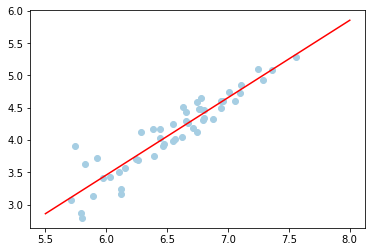

In [25]:
# Calcul de la régression linéaire avec SickiLearn
from sklearn.linear_model import LinearRegression 
# le module scikit
df = dataCrime[dataCrime.Date==2005]
# On transforme les colonnes en array
x = np.array(df.Pop_Log10)
y = np.array(df.Crime_Log10)

# On doit transformer la forme des vecteurs pour qu'ils puissent être
# utilisés par Scikit learn
# Une particularité de l'algorithme sklearn est que la plupart d'entre eux nécessitent que
# leur entrée soit de la forme [n_samples, n_features]. 
# Notre jeu de données ne suit pas actuellement cette forme, X_train et X_val sont des tableaux 1D.
# Nous devons les transformer en tableaux 2D. 

X = x.reshape(-1,1)
Y = y.reshape(-1,1)

# Y = [Intercept] + [Slope] * X
reg = LinearRegression(normalize=True)
reg.fit(X,Y)

a = reg.coef_[0] # pour éviter une erreur de calcul avec plt.plot
b = reg.intercept_

ordonne = np.linspace(5.5,8,100)# Création de valeur de test pour tracer la droite

plt.scatter(X,Y)
plt.plot(ordonne,a*ordonne+b,color='r')

In [27]:
# Résultat 
#Pop = a*crime+b

In [28]:
# Calcul de la régression linéaire avec ScyPy
import scipy.stats
xy = np.array([df.Pop_Log10,
                df.Crime_Log10])
result = scipy.stats.linregress(xy)

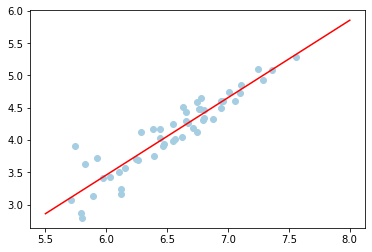

In [29]:
plt.scatter(X,Y)
plt.plot(ordonne,result.slope*ordonne+result.intercept,color='r')

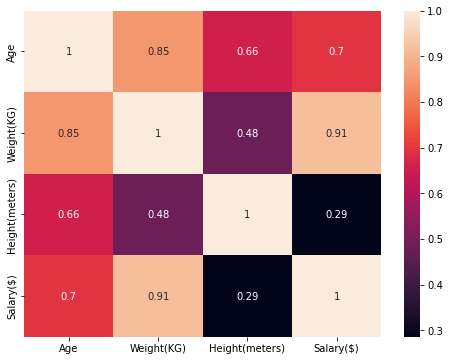

In [30]:
employees_df = pd.DataFrame({
    'Name': ["Jonathan", "Will", "Michael", "Liva", "Sia", "Alice"],
    'Age': [20, 22, 29, 20, 20, 21],
    'Weight(KG)': [65, 75, 80, 60, 63, 70],
    'Height(meters)': [1.6, 1.7, 1.85, 1.69, 1.8, 1.75],
    'Salary($)': [3200, 3500, 4000, 2090, 2500, 3600]

})

corr_df = employees_df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

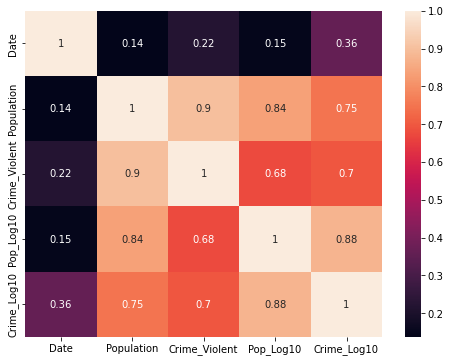

In [31]:
corr_df = dataCrime.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

# II Cours 2 - Deuxième partie : Liaison entre deux variables quantitatives

In [32]:
df_Quali = pd.read_table('qualitatif.txt',delimiter=' ')
df_Quali

,cheveux,yeux,sexe
0,Noir,Marron,Male
1,Blond,Bleu,Femelle
2,Noir,Bleu,Male
3,Marron,Marron,Femelle
4,Roux,Marron,Male
...,...,...,...
587,Blond,Marron,Femelle
588,Marron,Bleu,Male
589,Marron,Noisette,Male
590,Marron,Noisette,Femelle


In [33]:
df_Quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cheveux  592 non-null    object
 1   yeux     592 non-null    object
 2   sexe     592 non-null    object
dtypes: object(3)
memory usage: 14.0+ KB


In [34]:
pd.crosstab(df_Quali.cheveux, df_Quali.yeux, margins=True)

yeux,Bleu,Marron,Noisette,Vert,All
cheveux,,,,,
Blond,94,7,10,16,127
Marron,84,119,54,29,286
Noir,20,68,15,5,108
Roux,17,26,14,14,71
All,215,220,93,64,592


In [35]:
pd.crosstab([df_Quali.cheveux, df_Quali.sexe], df_Quali.yeux, margins=True)

yeux             Bleu  Marron  Noisette  Vert  All
cheveux sexe                                      
Blond   Femelle    64       4         5     8   81
        Male       30       3         5     8   46
Marron  Femelle    34      81        29    14  158
        Male       50      38        25    15  128
Noir    Femelle     9      36         5     2   52
        Male       11      32        10     3   56
Roux    Femelle     7      16         7     7   37
        Male       10      10         7     7   34
All               215     220        93    64  592

In [36]:
pd.pivot_table(df_Quali, index=['cheveux'],columns=['yeux'], aggfunc='count',margins=True)

sexe                          
yeux    Bleu Marron Noisette Vert  All
cheveux                               
Blond     94      7       10   16  127
Marron    84    119       54   29  286
Noir      20     68       15    5  108
Roux      17     26       14   14   71
All      215    220       93   64  592

In [39]:
# Tableau de fréquence en pourcentage
table = pd.crosstab(df_Quali.cheveux, df_Quali.yeux, margins=True, normalize=True)
table
table*100

yeux,Bleu,Marron,Noisette,Vert,All
cheveux,,,,,
Blond,15.878378,1.182432,1.689189,2.702703,21.452703
Marron,14.189189,20.101351,9.121622,4.898649,48.310811
Noir,3.378378,11.486486,2.533784,0.844595,18.243243
Roux,2.871622,4.391892,2.364865,2.364865,11.993243
All,36.317568,37.162162,15.709459,10.810811,100.000000


<AxesSubplot:xlabel='cheveux'>

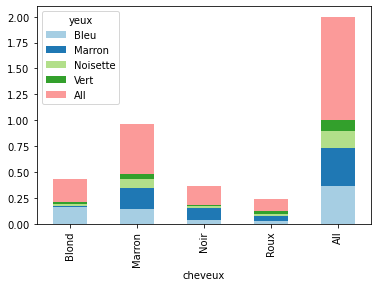

In [40]:
# Tableau de fréquence en pourcentage représentation
pd.crosstab(df_Quali.cheveux, df_Quali.yeux, margins=True, normalize=True).plot.bar(stacked=True)

In [41]:
from scipy.stats import chi2_contingency
chi2, pvalue, degrees, expected = chi2_contingency(table)
chi2, degrees, pvalue

(0.23359770544933828, 16, 0.9999999999992256)